In [43]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker

In [106]:
def smooth_broken_power_law(x, A, xb, alpha1, alpha2, delta):
    term1 = (x / xb) ** (-alpha1)
    term2 = (0.5*(1 + (x / xb) ** (1 / delta))) ** ((alpha1 - alpha2) * delta)
    return A * term1 * term2

def T(x,x0,a):
    return 1/(1+np.exp(-a*(x-x0)))

In [104]:
Vmag = 10**np.linspace(-3,2,1001)
sigma_ph = np.zeros(len(Vmag))
nn=100000
for i, vv in enumerate(Vmag):
    x=np.random.randn(nn)+vv
    y=np.random.randn(nn)
    sigma_ph[i] = np.std(np.angle(x+1j*y))

Text(0.5, 0, 'S/N ratio (dB)')

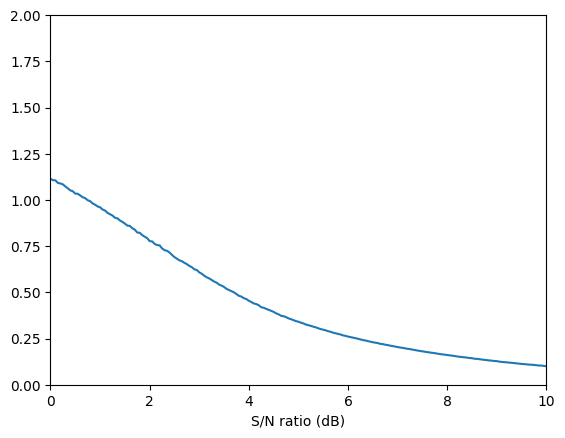

In [110]:
plt.plot(10*np.log10(Vmag),sigma_ph)
plt.xlim(0,10)
plt.ylim(0,2)
plt.xlabel("S/N ratio (dB)")

Text(0.5, 1.0, 'S/N for Visibility phase')

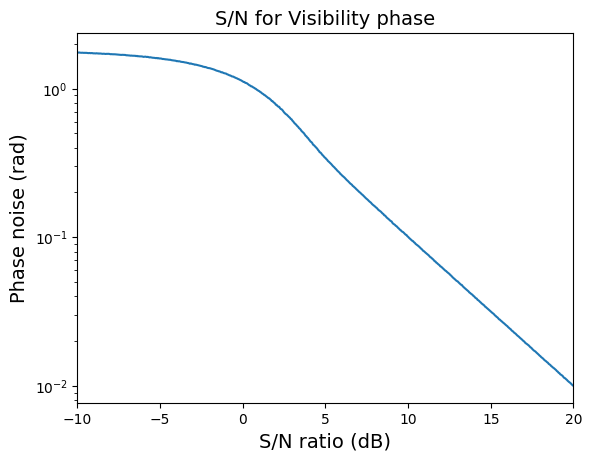

In [119]:
plt.semilogy(10*np.log10(Vmag),sigma_ph)
plt.xlim(-10,20)
# plt.ylim(0,2)
plt.ylabel("Phase noise (rad)",fontsize=14)
plt.xlabel("S/N ratio (dB)", fontsize=14)
plt.title("S/N for Visibility phase",fontsize=14)

In [64]:
nchans=100
dnu=1e3 #Hz
chans=10**np.linspace(1,4,1001)
BW=10**np.linspace(3,7,1001)
# BW=chans*dnu
chans=BW/dnu
sigma_phi=10**np.linspace(-3,0,1001)
xx,yy=np.meshgrid(BW,sigma_phi)
changrid=xx/dnu
# dtau = sigma_phi*np.sqrt(6/(nchans*(nchans+1)*(2*nchans+1)))/(2*np.pi*dnu)

In [65]:
dtau = yy*np.sqrt(6/(changrid*(changrid+1)*(2*changrid+1)))/(2*np.pi*dnu)

[3. 4. 5. 6. 7.] [-3. -2. -1.  0.]


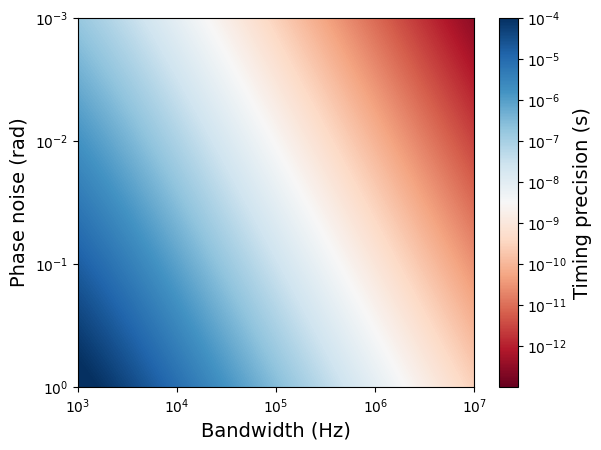

In [103]:
extent=[3,7,0,-3]
plt.imshow(np.log10(dtau),aspect='auto',interpolation='none',cmap='RdBu',extent=extent,vmin=-13,vmax=-4)
ax=plt.gca()
# ax.set_xticks(BW[::10])
# ax.set_yticks(sigma_phi[::10])
x_ticks = np.linspace(3,7,5)  # Evenly spaced ticks in data range
y_ticks = np.linspace(-3,0,4)
print(x_ticks, y_ticks)

x_labels = [f'$10^{{{tick:.0f}}}$' for tick in x_ticks]
y_labels = [f'$10^{{{tick:.0f}}}$' for tick in y_ticks]
plt.xticks(x_ticks,x_labels)
plt.yticks(y_ticks, y_labels)
plt.xlabel("Bandwidth (Hz)",fontsize=14)
plt.ylabel("Phase noise (rad)",fontsize=14)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
cbar=plt.colorbar()
c_ticks = np.linspace(-4,-12,9)
c_labels = [f'$10^{{{tick:.0f}}}$' for tick in c_ticks]
cbar.set_ticks(c_ticks)
cbar.set_ticklabels(c_labels)
cbar.set_label("Timing precision (s)",fontsize=14)

In [58]:
sigma_phi[500]

0.03162277660168379

In [56]:
yy[10]

array([0.00107152, 0.00107152, 0.00107152, ..., 0.00107152, 0.00107152,
       0.00107152])

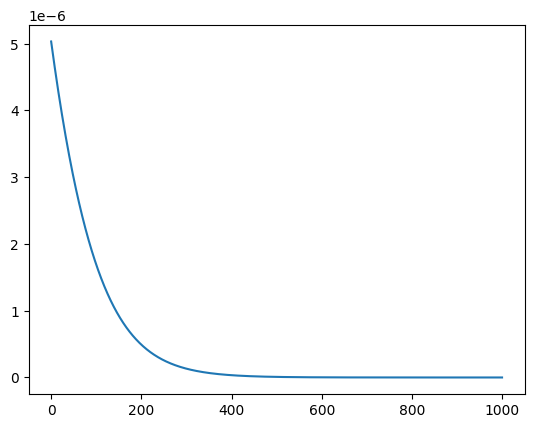

In [85]:
plt.plot(dtau[500,:])

In [ ]:
chans

In [20]:
sigma_phi

array([0.001     , 0.00100693, 0.00101391, ..., 0.98627949, 0.99311605,
       1.        ])

In [90]:
params=np.polyfit(Vmag[:800],sigma_ph[:800],6)

(0.0, 2.0)

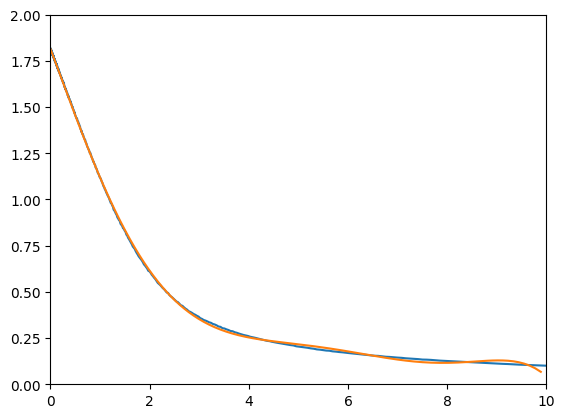

In [93]:
plt.plot(Vmag,sigma_ph)
plt.plot(Vmag[:800],np.polyval(params,Vmag[:800]))
plt.xlim(0,10)
plt.ylim(0,2)

In [86]:
sigma_ph[800]

0.10060706118167201

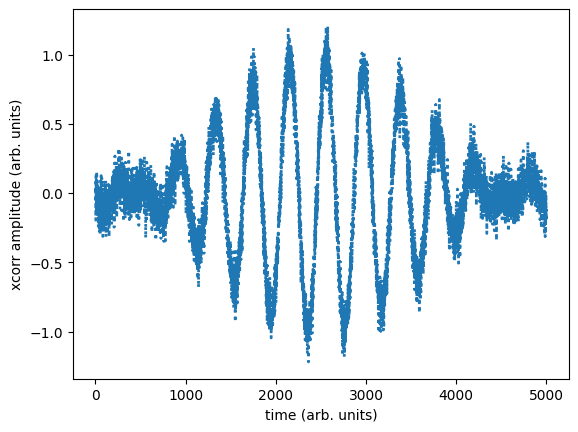

In [151]:
n=np.arange(5000)
N=4096
k=10
dk=2
y=np.sinc(dk*(n-len(n)//2)/N)*(np.sin(n*k*2*np.pi/N)) + 0.1*np.random.randn(len(n))
plt.xlabel("time (arb. units)")
plt.ylabel("xcorr amplitude (arb. units)")

plt.plot(y,lw='2',ls='dotted')